<a href="https://colab.research.google.com/github/cybermad7373/AIML-Learning/blob/master/Supervised_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [57]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv",encoding='cp949').drop(["Date", "Holiday", "Seasons"], axis=1)

In [58]:
  df.columns = dataset_cols
  df["functional"] = df["functional"].map({"Yes": 1, "No": 0})
  df = df[df["hour"] == 12]
  df = df.drop("hour", axis=1)

In [59]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


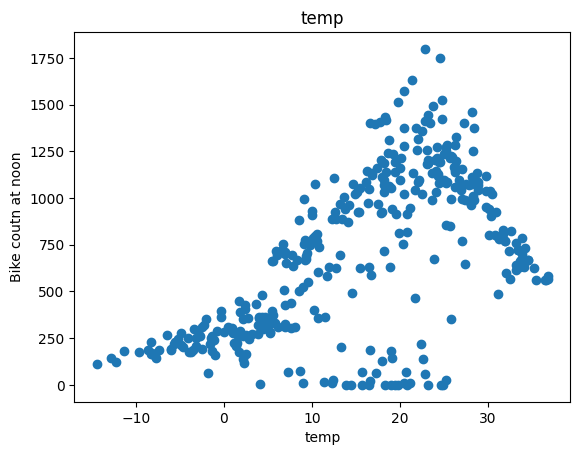

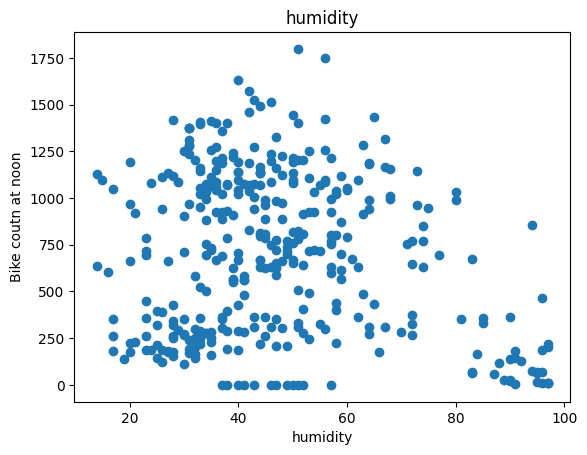

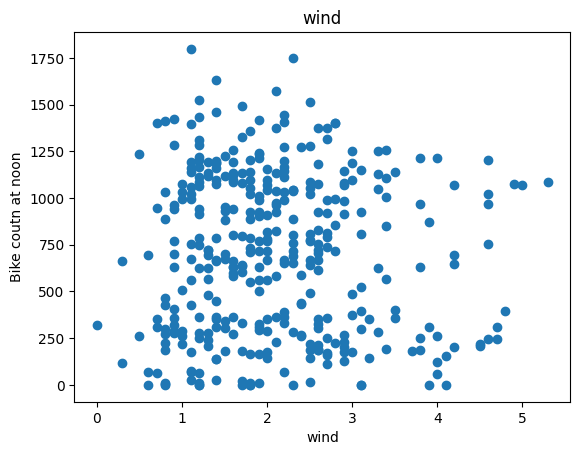

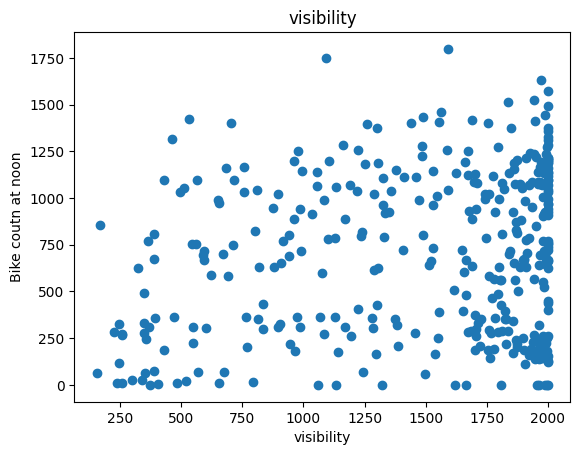

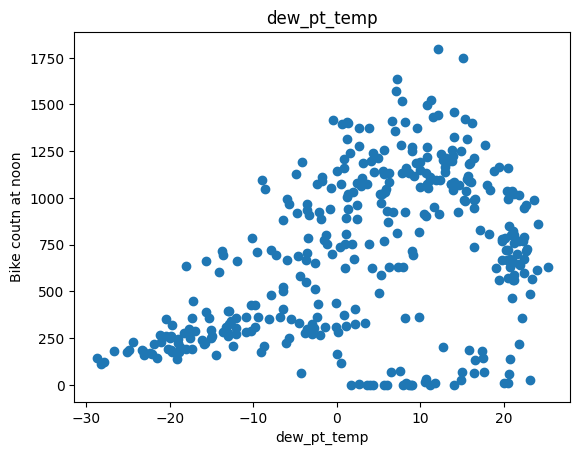

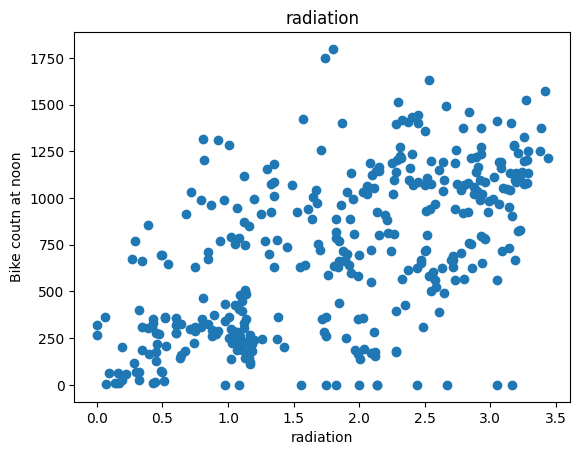

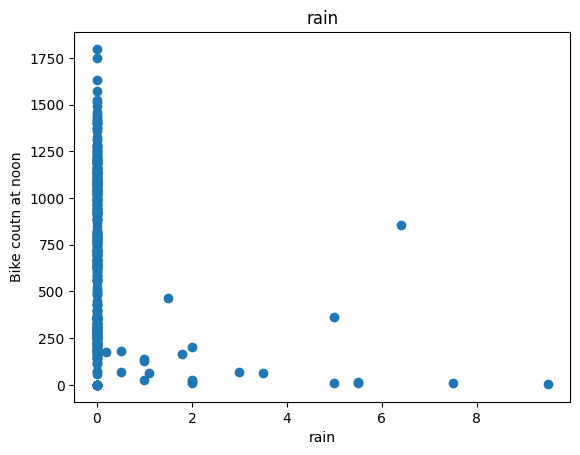

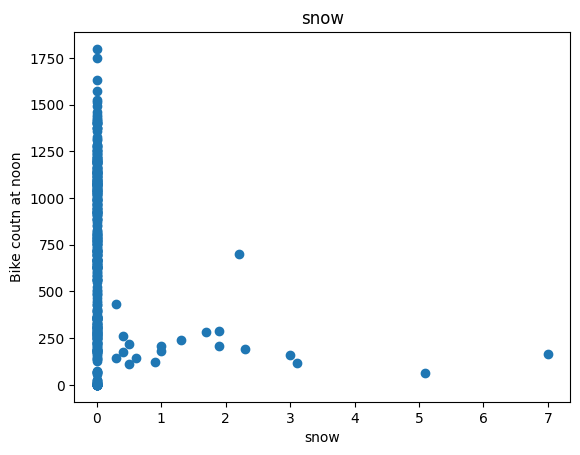

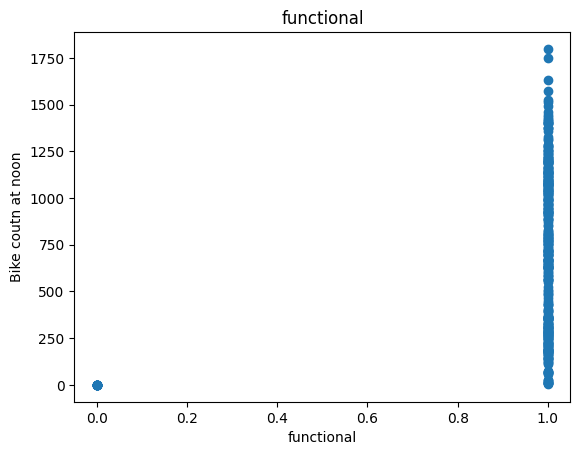

In [60]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike coutn at noon")
  plt.xlabel(label)
  plt.show()

In [61]:
df.drop(["wind","visibility","functional"], axis=1)

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


In [62]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


# Train , validation , Test data

In [63]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [64]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if  x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [65]:
_,X_train_temp,y_train_temp = get_xy(train, "bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp = get_xy(val, "bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp = get_xy(test, "bike_count",x_labels=["temp"])

In [66]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [67]:
print(temp_reg.coef_,temp_reg.intercept_)

[[22.07932778]] [364.10625545]


In [68]:
temp_reg.score(X_test_temp,y_test_temp)

0.367192969238338

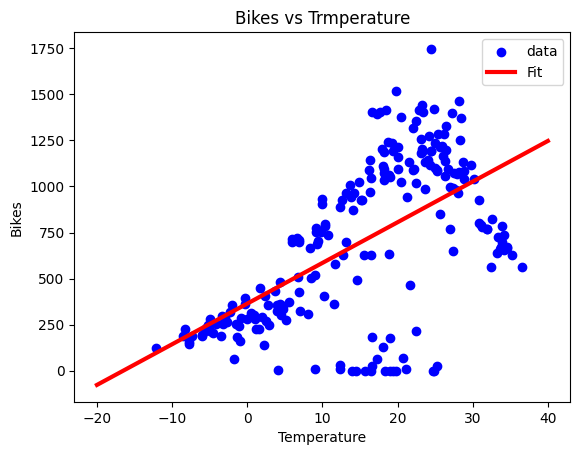

In [69]:
plt.scatter(X_train_temp,y_train_temp, label = "data", color = "blue")
# plt.scatter(X_test_temp,y_test_temp, lable = "data", color = "red")
x = np.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color  = 'red', linewidth = 3)
plt.legend()
plt.title("Bikes vs Trmperature")
plt.xlabel("Temperature")
plt.ylabel("Bikes")
plt.show()

### Multiple Linear Regression

In [26]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')

In [37]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])
_,X_train_all,y_train_all = get_xy(train, "bike_count",x_labels = df.columns[1:])
_,X_val_all,y_val_all = get_xy(val, "bike_count",x_labels = df.columns[1:])
_,X_test_all,y_test_all = get_xy(test, "bike_count",x_labels = df.columns[1:])

In [38]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [39]:
print(all_reg.coef_,all_reg.intercept_)

[[-1.02246759e+01 -1.05976292e+01 -3.40508843e+01  3.93497043e-03
   2.74170990e+01  1.48240647e+02 -3.05623864e+01 -1.82972137e+01
   7.81886037e+02]] [286.47521997]


In [40]:
all_reg.score(X_test_temp,y_test_temp)

0.6390617287689953

### Regression with Neural net

In [70]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [76]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [78]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      loss="mean_squared_error")

In [80]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp.reshape(-1), # Reshape y_train_temp to have the same number of samples as X_train_temp
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

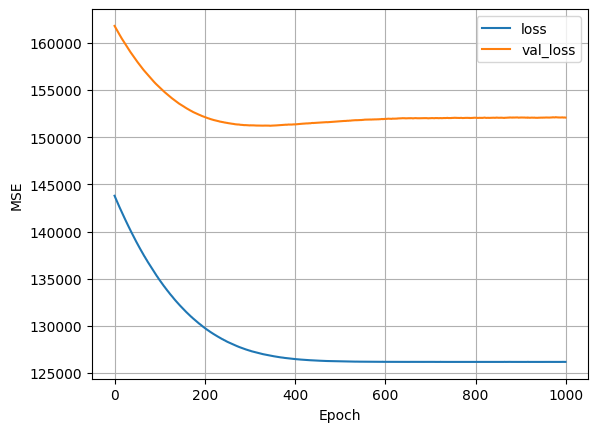

In [81]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


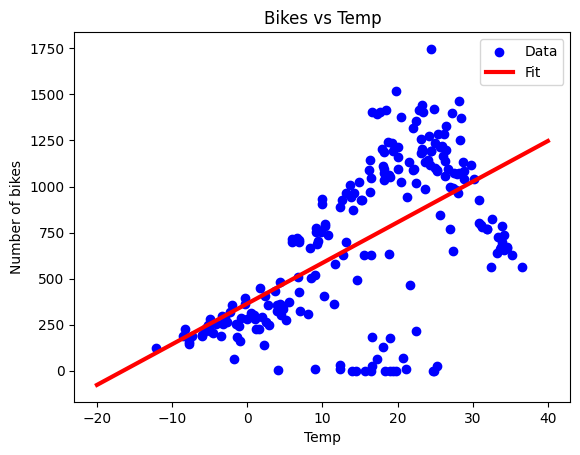

In [82]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

### Neural Net

In [89]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [90]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

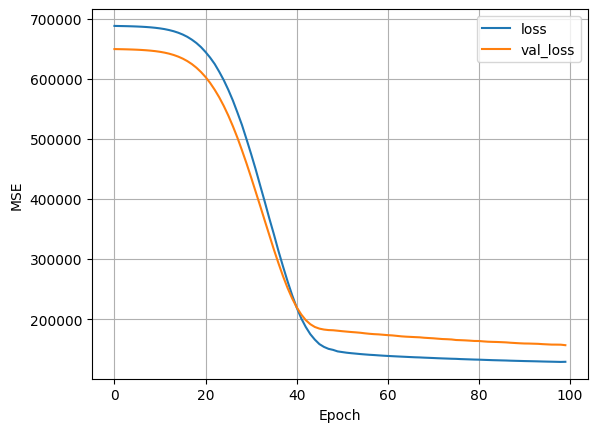

In [91]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


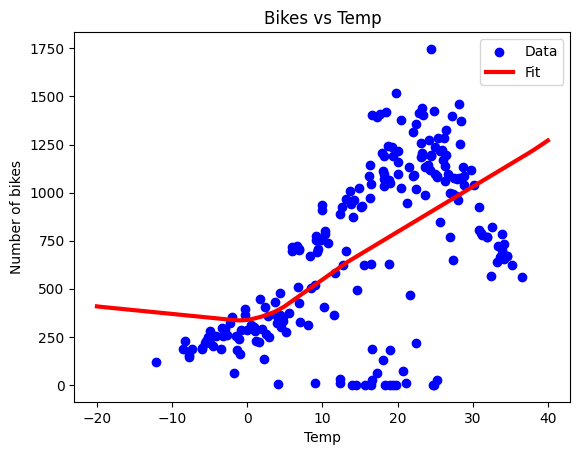

In [92]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [96]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(len(df.columns[1:]),), axis=-1)
all_normalizer.adapt(X_train_all)

In [97]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [98]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

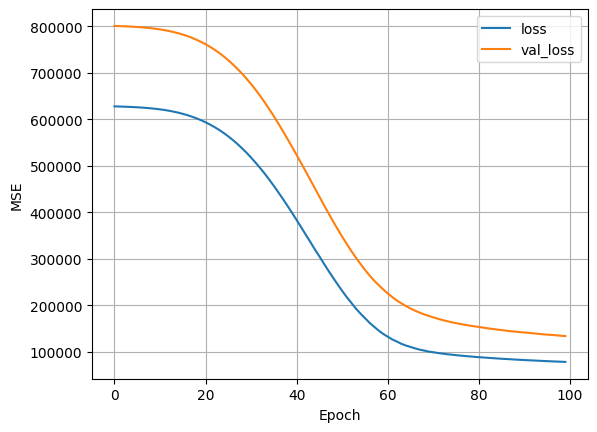

In [99]:
plot_loss(history)

In [100]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [101]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [102]:
MSE(y_pred_lr, y_test_all)

70780.45731373834

In [103]:
MSE(y_pred_nn, y_test_all)

91088.37969988832

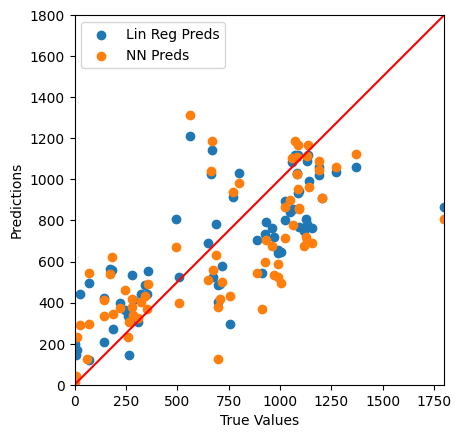

In [104]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")